# Counting Stars

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits
from astropy.utils.data import download_file
img_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True)

In [2]:
img_data = fits.getdata(img_file)

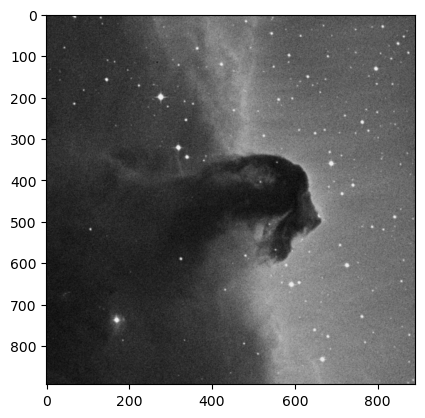

In [5]:
plt.imshow(img_data, cmap='gray')

## Scale of point source

In [7]:
exampleStar = img_data[580:600, 315:335]
exampleStar2 = img_data[:15, 125:140]

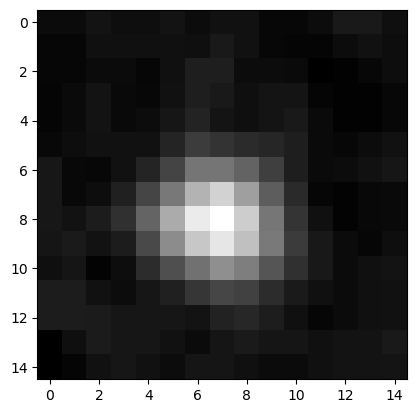

In [6]:
plt.imshow(img_data[:15, 125:140], cmap='gray')

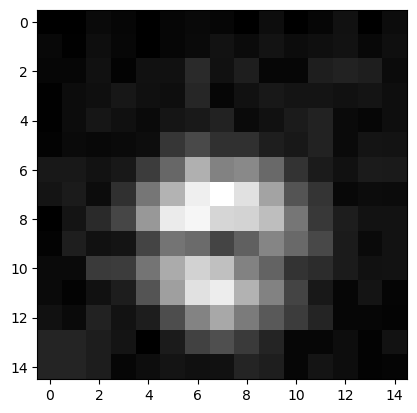

In [9]:
plt.imshow(exampleGrad2, cmap='gray')

In [8]:
exampleGrad = np.zeros(exampleStar.shape)
for i in range(len(exampleStar)):
    for j in range(1, len(exampleStar[0])):
        exampleGrad[i, j] += abs(exampleStar[i, j] - exampleStar[i, j - 1])
for i in range(1, len(exampleStar)):
    for j in range(len(exampleStar[0])):
        exampleGrad[i, j] += abs(exampleStar[i, j] - exampleStar[i - 2, j])
        
exampleGrad2 = np.zeros(exampleStar2.shape)
for i in range(len(exampleStar2)):
    for j in range(1, len(exampleStar2[0])):
        exampleGrad2[i, j] += abs(exampleStar2[i, j] - exampleStar2[i, j - 1])
for i in range(1, len(exampleStar2)):
    for j in range(len(exampleStar2[0])):
        exampleGrad2[i, j] += abs(exampleStar2[i, j] - exampleStar2[i - 2, j])

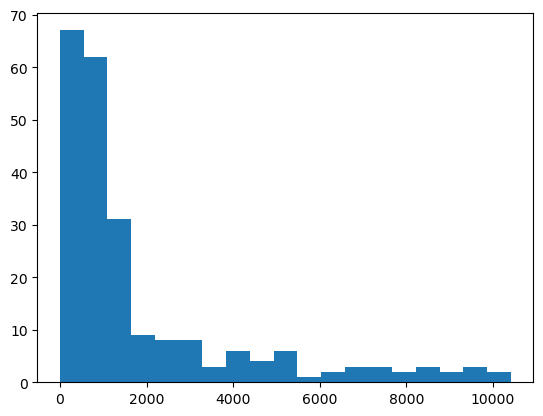

In [10]:
exampleHist = plt.hist(exampleGrad2.flatten(), bins='auto')

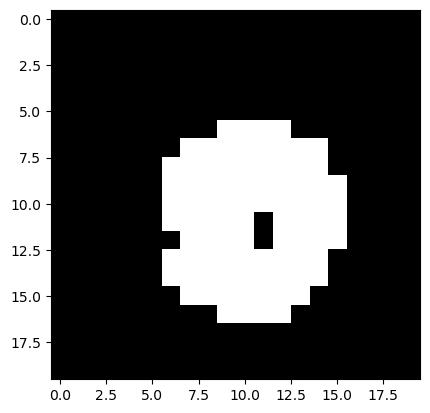

In [32]:
exampleCut = np.zeros(exampleGrad.shape)
for i in range(len(exampleGrad)):
    for j in range(len(exampleGrad[0])):
        if (exampleGrad[i, j] >= 2500):
            exampleCut[i, j] = 100
        else:
            exampleCut[i, j] = 0
plt.imshow(exampleCut, cmap='gray')

exampleCut2 = np.zeros(exampleGrad2.shape)
for i in range(len(exampleGrad2)):
    for j in range(len(exampleGrad2[0])):
        if (exampleGrad2[i, j] >= 4500):
            exampleCut2[i, j] = 100
        else:
            exampleCut2[i, j] = 0
plt.imshow(exampleCut, cmap='gray')

Star 1 size: around 10 x 10 pixels.
Star 2 size: around 6 x 6 pixels.
Mean: 8 x 8 pixels

In [12]:
annulus = np.zeros((10, 10))
for i in range(4, 6):
    for j in range(4, 6):
        annulus[1, j] = 100
        annulus[8, j] = 100
    annulus[i, 1] = 100
    annulus[i, 8] = 100
    
for i in range(2, 8):
    for j in range(2, 8):
        annulus[i, j] = 100

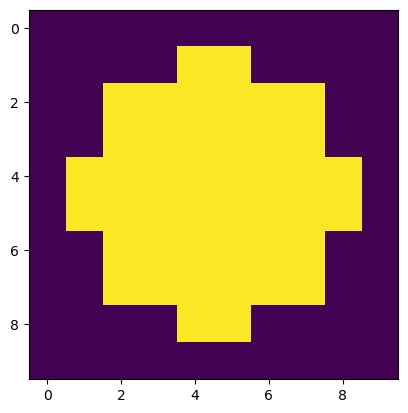

In [13]:
plt.imshow(annulus)

## Sliding Circle
it's not actually an annulus...lol

In [33]:
# testImgData = img_data[:100, :100]
# testImgData = img_data[:200, :200]
# testImgData = img_data[:400, :400]
testImgData = img_data

In [34]:
internalCount = 0
externalCount = 0
ratio = 3

In [35]:
mark = np.zeros(testImgData.shape)
mark_lowerThreshold = np.zeros(testImgData.shape)
mark_higherThreshold = np.zeros(testImgData.shape)
for i in range(len(testImgData) - 9):
    for j in range(len(testImgData[0]) - 9):    
        ic = 0
        ec = 0
        for x in range(10):
            for y in range(10):
                if (annulus[x, y] == 100):
                    ic += testImgData[i + x, j + y]
                    
                else:
                    ec += testImgData[i + x, j + y]
        #print(ic/44, ec/56)
        if (ic/44 > 1.08 * ec/56):
            mark[i + 5, j + 5] = 100
        if (ic/44 > 1.05 * ec/56):
            mark_lowerThreshold[i + 5, j + 5] = 100
        if (ic/44 > 1.1 * ec/56):
            mark_higherThreshold[i + 5, j + 5] = 100

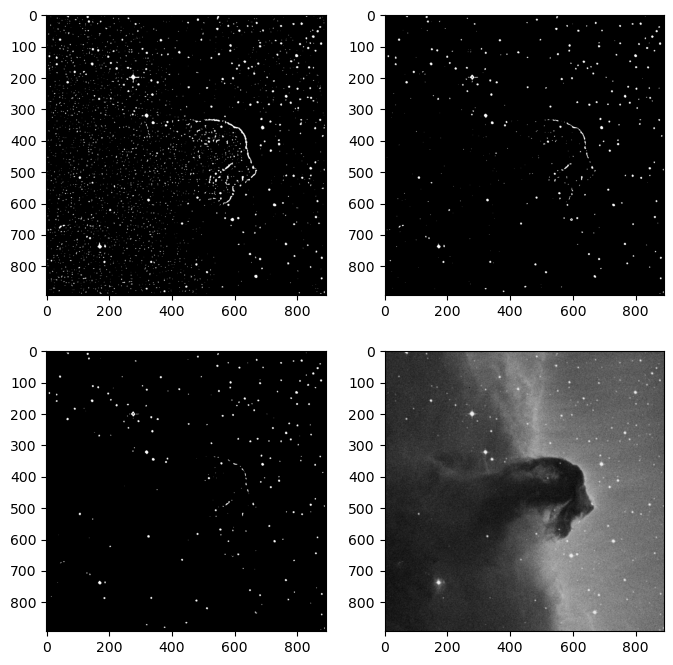

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
axes[0, 0].imshow(mark_lowerThreshold, cmap='gray')
axes[0, 1].imshow(mark, cmap='gray')
axes[1, 0].imshow(mark_higherThreshold, cmap='gray')
axes[1, 1].imshow(testImgData, cmap='gray')

## Counting all marked stars

In [45]:
count = 0
count_low = 0
count_high = 0

In [46]:
def neighbor (i, j):
    try:
        if (matrix[i - 1][j] or 
            matrix[i - 1][j - 1] or
            matrix[i - 1][j + 1] or
            matrix[i][j - 1]):
            matrix[i][j] = True
            return 0
        else:
            matrix[i][j] = True
            return 1
    except:
        return 0

In [54]:
matrix = [[False for i in range(len(img_data[0]))] for j in range(len(img_data))]
for i in range(len(mark)):
    for j in range(len(mark[0])):
        if (mark[i, j] == 100):
            matrix[i][j] = True
            if (neighbor(i, j) == 1):
                count += 1
        else:
            matrix[i][j] = False

In [55]:
print(count, count_low, count_high)

430 5527 255


earlier tested a ratio of 1.09 -> 314 (pi number!)